<a href="https://colab.research.google.com/github/jephersonnn/helmet_detection_thesis/blob/main/TEAM_HELMET_Helmet_Image_Detection_using_Keras_and_TFLite_Converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preparation**

# **Install TFlife-model-maker**

In [1]:
!pip install h5py pip install typing-extensions pip install wheel
!pip install -q tflite-model-maker-nightly
!pip install -q tflite-support-nightly
!pip install --upgrade tensorflow
!pip install tflite-runtime
!pip install scann

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.8/577.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 3.7 MB/s eta 0:00:00
  Preparing metad

# **Import the required packages.**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

Mounted at /content/gdrive


# **Unzip Dataset**

The compressed zip should contain a root folder, with respective folders of the labels (Root Folder should contain Label1, Label2. In this case, it should contain helmet-on and helmet-off)

In [3]:
import pathlib
!unzip '/content/gdrive/MyDrive/3J&S Thesis Repo/Model/Trial Model/helmet_0.1.zip'

#dataset_url = "https://drive.google.com/open?id=1PUFo_RisSdh_eDUHLw9KQGWCA5VvPr6a&authuser=ericjeffrey.cb%40gmail.com&usp=drive_fs"
#data_dir = tf.keras.utils.get_file('helmet_0.1', origin=dataset_url, extract=True)


Archive:  /content/gdrive/MyDrive/3J&S Thesis Repo/Model/Trial Model/helmet_0.1.zip
   creating: helmet_0.1/
  inflating: helmet_0.1/.DS_Store    
  inflating: __MACOSX/helmet_0.1/._.DS_Store  
   creating: helmet_0.1/helmet-on/
   creating: helmet_0.1/helmet-off/
  inflating: helmet_0.1/helmet-on/20230118_151837.JPG  
  inflating: __MACOSX/helmet_0.1/helmet-on/._20230118_151837.JPG  
  inflating: helmet_0.1/helmet-on/20230118_153211.JPG  
  inflating: __MACOSX/helmet_0.1/helmet-on/._20230118_153211.JPG  
  inflating: helmet_0.1/helmet-on/20230118_152522.JPG  
  inflating: __MACOSX/helmet_0.1/helmet-on/._20230118_152522.JPG  
  inflating: helmet_0.1/helmet-on/20230118_151413.JPG  
  inflating: __MACOSX/helmet_0.1/helmet-on/._20230118_151413.JPG  
  inflating: helmet_0.1/helmet-on/20230118_151407.JPG  
  inflating: __MACOSX/helmet_0.1/helmet-on/._20230118_151407.JPG  
  inflating: helmet_0.1/helmet-on/20230118_150527.JPG  
  inflating: __MACOSX/helmet_0.1/helmet-on/._20230118_150527.JPG

In [22]:
image_count = len(list(data_dir.glob('*/*.JPG')))
print(image_count)

325


# Resizing values


In [4]:
batch_size = 20
img_height = 180
img_width = 180

## Train the image detection model

### Load and split the dataset


In [5]:
data_dir = pathlib.Path('/content/helmet_0.1')

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 325 files belonging to 2 classes.
Using 260 files for training.
Found 325 files belonging to 2 classes.
Using 65 files for validation.
['helmet-off', 'helmet-on']


# Show training data

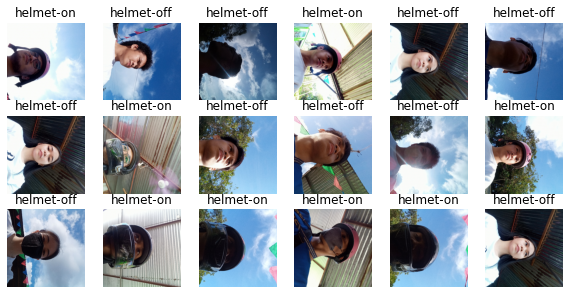

In [79]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(18):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Create Model

In [7]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile and train the model

Epoch 1/5
13/13 [==============================] - 27s 2s/step - loss: 1.0059 - accuracy: 0.6077 - val_loss: 0.6595 - val_accuracy: 0.6923
Epoch 2/5
13/13 [==============================] - 14s 1s/step - loss: 0.5835 - accuracy: 0.7423 - val_loss: 0.5071 - val_accuracy: 0.8308
Epoch 3/5
13/13 [==============================] - 9s 677ms/step - loss: 0.3216 - accuracy: 0.8885 - val_loss: 0.3387 - val_accuracy: 0.8769
Epoch 4/5
13/13 [==============================] - 13s 1s/step - loss: 0.2017 - accuracy: 0.9192 - val_loss: 0.3262 - val_accuracy: 0.9077
Epoch 5/5
13/13 [==============================] - 16s 1s/step - loss: 0.1413 - accuracy: 0.9500 - val_loss: 0.6971 - val_accuracy: 0.7538
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)   

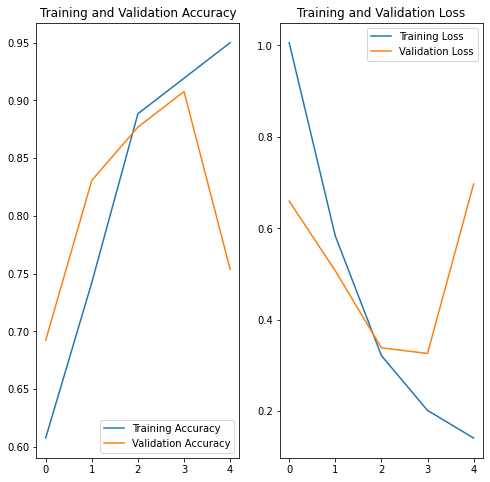

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Overfitting

Overfitting may happen if there are few datasets in training. The validation accuracy is affected by this because the model overtrains itself that it notices unwanted details of the data. To counter this, we can use **data augmentation**, or **data dropout**.

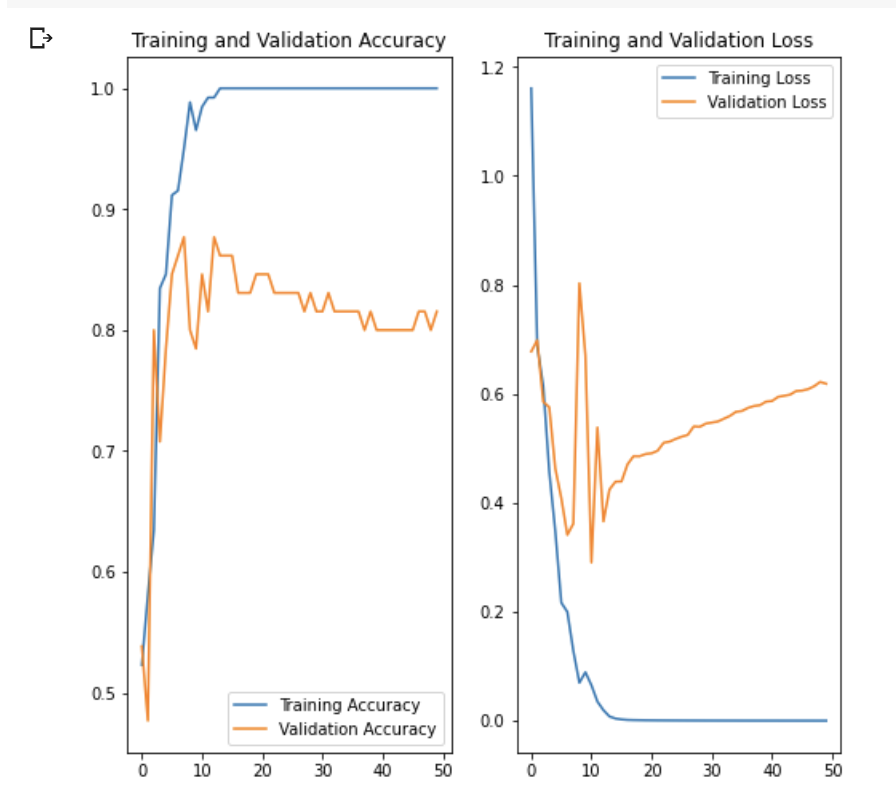

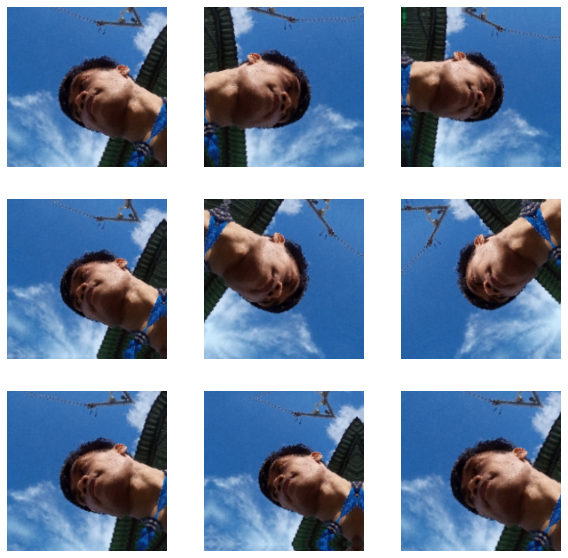

In [9]:
#Data Augmentation

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#Dropout - Must Dropout
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# Recompile and Train Model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.summary()

Epoch 1/5
13/13 [==============================] - 18s 1s/step - loss: 0.8599 - accuracy: 0.5000 - val_loss: 0.7124 - val_accuracy: 0.4769
Epoch 2/5
13/13 [==============================] - 14s 1s/step - loss: 0.6812 - accuracy: 0.5769 - val_loss: 0.6860 - val_accuracy: 0.4923
Epoch 3/5
13/13 [==============================] - 15s 1s/step - loss: 0.6383 - accuracy: 0.6308 - val_loss: 0.7871 - val_accuracy: 0.4769
Epoch 4/5
13/13 [==============================] - 15s 1s/step - loss: 0.6312 - accuracy: 0.6808 - val_loss: 0.6007 - val_accuracy: 0.7846
Epoch 5/5
13/13 [==============================] - 10s 778ms/step - loss: 0.6185 - accuracy: 0.6692 - val_loss: 0.5875 - val_accuracy: 0.7231
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Re

## Visualize Results

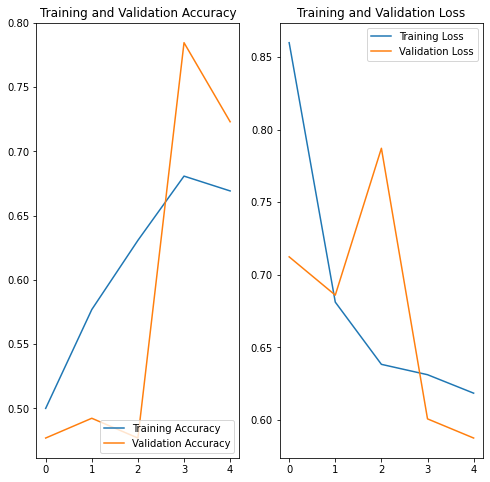

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Test Model with Prediction

Test loss: 0.587547779083252
Test accuracy: 0.7230769395828247
helmet-off 56.14%


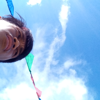

In [13]:
#test prediction
#!unzip "/content/gdrive/MyDrive/3J&S Thesis Repo/Model/Test/Test-data.zip"

#load

score = model.evaluate(val_ds, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

def predict_helmet(img_no):
  #test_path = "/content/"+ str(img_no) +".jpg"
  test_path = "/content/helmet_0.1/helmet-off/20230118_150703.JPG"
  img = tf.keras.utils.load_img(
      test_path, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  #print(score)
  helmet_status = class_names[np.argmax(score)] #helmet_status may be equal to helmet_on or off
  confidence = 100 * np.max(score) #percentage
  threshold = 60
  print(
      "{} {:.2f}%"
      .format(helmet_status, confidence)
  )

  if helmet_status == "helmet-off" and confidence >= threshold:
    print('EEENGGKKK ENGGKKK ENGGKKK')

  #print(class_names[np.argmax(score)]) #prints the classname with most confidence


  from PIL import Image
  img = Image.open(test_path)
  img.thumbnail((100,100))
  img.show()

#x=1
#while x!=30:
predict_helmet(1)
#  x+=1



# Save models in h5 and converted TFLITE

In [29]:
from datetime import datetime
import pytz

timezone = pytz.timezone('Asia/Manila')
now = datetime.now(timezone)
date = str(now.strftime("%b")) + "-" + str(now.day) + "-" + str(now.year)
time = str(now.hour) + ":" + str(now.minute) + ":" + str(now.second)
right_now = date + " " + time



# Save model as h5
model.save("trial_model " + right_now +".h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


# Save the model in TFLite.
with open('trial_model ' + right_now +'.tflite', 'wb') as f:
  f.write(tflite_model)


In [72]:
#save weights
model.save_weights('model.h5')
#load weights
model.load_weights('model.h5')

# TFLite Model Test

In [19]:
# Load Model
import tensorflow as tf
import numpy as np
import cv2

#!unzip "/content/gdrive/MyDrive/3J&S Thesis Repo/Model/Test/Test-data.zip" -d "/content/test"

model_path = '/content/trial_model '+right_now+'.tflite'
test_path = "/content/test/22.jpg"
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(output_details)

image = cv2.imread(test_path)

input_shape = interpreter.get_input_details()[0]['shape']
input_data = cv2.resize(image, (input_shape[1], input_shape[2]))
input_data = np.expand_dims(input_data, axis=0)
input_data = input_data.astype(np.float32) / 255.0

# Run inference on the TFLite model.
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

# Postprocess the output.
class_labels = ["helmet-off", "helmet-on"]
predicted_class = class_labels[np.argmax(output_data)]

print(predicted_class)
print(str(np.max(output_data)))
print(output_data)



[{'name': 'StatefulPartitionedCall:0', 'index': 20, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
helmet-on
0.62528026
[[-0.7071269   0.62528026]]


##Another TFLite Test

In [32]:
# Load Model
import tensorflow as tf
import numpy as np
import cv2

#!unzip "/content/gdrive/MyDrive/3J&S Thesis Repo/Model/Test/Test-data.zip" -d "/content/test"

model_path = '/content/trial_model '+right_now+'.tflite'
#test_path = "/content/test/2.jpg"
test_path = "/content/helmet_0.1/helmet-off/20230118_150703.JPG"
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.get_signature_list()

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

classify_lite = interpreter.get_signature_runner('serving_default')

predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

# Run inference on the TFLite model.
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)


This image most likely belongs to helmet-off with a 56.14 percent confidence.
